## RKHS

통계학 세미나: Reproducing Kernel Hilbert Space 소개 (Part1)

https://youtu.be/lgvcyCPxNDQ

https://ngilshie.github.io/jekyll/update/2018/02/01/RKHS.html

$$
{(\mathbf x_i, y_i)}_{i=1}^{n} \overset{iid}{\sim} P(\Chi) \subset \Chi \times \R
$$

A goal for a regression problem: Estimating the function $m$ that minimizes $\mathbb{E}[\{Y-m(X)\}^2]$.

A penalized estimator can be obtained by

$$
\hat{m} \coloneqq \argmin_{m \in \mathcal H} \left[ \sum_{i=1}^{n} \{ y_i - m(\mathbf x_i) \}^2 + \lambda \|m\|_{\mathcal H}^2 \right] \qquad (\lambda > 0)
$$

$f : \mathcal X \rightarrow \R$ is too general. ($f$ as a nonlinear function)

The key idea of to use a (nonlinear) map $\phi$.\
$\phi : \mathcal X \rightarrow \mathcal H$ s.t. $f$ lies in the **linear** space of $\mathcal H$. ($f \in \mathcal H$)

$\phi$ can be a nonlinear basis function.

<div style="display: flex; justify-content: center;">
    <img src="https://www.mdpi.com/electronics/electronics-09-00615/article_deploy/html/images/electronics-09-00615-g002.png" height=200 />
</div>

$$
\phi : \R^2 \rightarrow \R^3 \\
\phi : (x_1, x_2) \mapsto (z_1, z_2, z_3) \coloneqq (x_1^2, \sqrt{2}x_1x_2, x_2^2)
$$

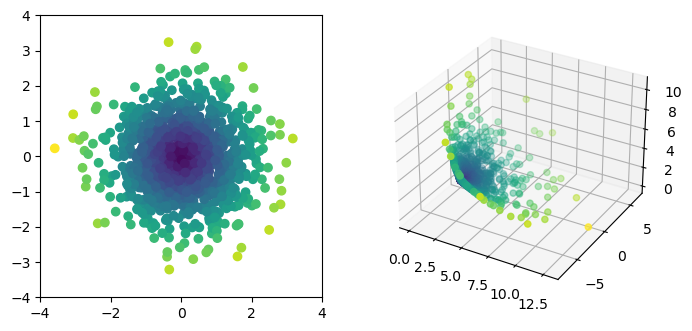

In [82]:
import torch
import matplotlib.pyplot as plt

X = torch.randn(2,1000)
x1, x2 = X

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(x1, x2, c=(x1**2+x2**2)**(1/2))
ax.axis('square')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.scatter(x1**2, 2**(1/2)*x1*x2, x2**2, c=(x1**2+x2**2)**(1/2))
plt.show()

### Kernels and RKHS

* Kernels and RKHS
* Kernel Tricks
* Kernel Methods: Supervised Learning
* Kernel Methods: Unsupervised Learning
* The Kernel Jungle
* Open Problems and Research Topics

https://www.youtube.com/watch?v=IzGS8uKc5E4


### Overview
#### Motivations
* Develop versatile algorithms to process and analyze data.
* Without making any assumptions regarding the type of data (vectors, images, graphs, strings etc.).

#### The Approach
* Develop methods based on **pairwise comparisons**.
* By imposing constraints on the pariwise comparison function (P(S)D kernels), we obtain a general framework for learning from data (optimization in RKHS).

https://youtu.be/IzGS8uKc5E4?t=774

> So... what is a kernel $\kappa$?

> The function $\kappa$, a comparison function.

<div style="display: flex; justify-content: center;">
    <img src="kernel.png" height=200 />
</div>

$\kappa$ is a comparison **function**.\
$\mathbf K$ is a $n \times n$ matrix (typically symmetric), whatever the nature of data.

$$
\kappa : \mathcal X \times \mathcal X \mapsto \R
$$

$$
[\mathbf K]_{ij} \coloneqq \kappa(\mathbf x_i, \mathbf x_j)
$$

$$
\mathbf K =
\begin{pmatrix}
1   & 0.5 & 0.3 \\
0.5 & 1   & 0.6 \\
0.3 & 0.6 & 1
\end{pmatrix}
$$

Poor scalability of $\mathbf K$ with respect to the dataset size; $\mathcal O(n^2)$ to compute and store $\kappa(\mathbf x, \mathbf x')$.

<span style="border: solid 1px black; padding: 4px;">
Definition
</span>

A positive definite (PD) kernel on a set $\mathcal X$ is a function $\kappa : \mathcal X \times \mathcal X \mapsto \R$ that is symmetric satisfies:

$$
\forall (\mathbf x, \mathbf x') \in \mathcal X^2, \quad \kappa(\mathbf x, \mathbf x') = \kappa(\mathbf x', \mathbf x)
$$

with